In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

In [2]:
csv_in = 'student-por-gp.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

In [3]:
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
#df.index = df.columns
print(df.shape)
print(df.info())
display(df.head())

(423, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        423 non-null    int64 
 1   reason     423 non-null    object
 2   studytime  423 non-null    object
 3   failures   423 non-null    int64 
 4   schoolsup  423 non-null    int64 
 5   higher     423 non-null    int64 
 6   goout      423 non-null    int64 
 7   health     423 non-null    int64 
 8   absences   423 non-null    int64 
 9   G3         423 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 33.2+ KB
None


,age,reason,studytime,failures,schoolsup,higher,goout,health,absences,G3
0,18,course,2 to 5 hours,0,1,1,4,3,4,11
1,17,course,2 to 5 hours,0,0,1,3,3,2,11
2,15,other,2 to 5 hours,0,1,1,2,3,6,12
3,15,home,5 to 10 hours,0,0,1,2,5,0,14
4,16,home,2 to 5 hours,0,0,1,2,5,0,13


In [4]:
df['G3'].value_counts()

G3
11    70
13    67
12    55
10    53
14    46
15    41
16    25
17    24
8     14
9     10
18     9
7      3
6      2
0      1
1      1
5      1
19     1
Name: count, dtype: int64

In [5]:
len(df[df['G3']>=13])

213

In [6]:
len(df[df['G3']<13])

210

In [7]:
df['G3_label']=0
for i in range(len(df)):
    if(df.loc[i,'G3']>=13):
        df.loc[i,'G3_label']=1

In [8]:
df

,age,reason,studytime,failures,schoolsup,higher,goout,health,absences,G3,G3_label
0,18,course,2 to 5 hours,0,1,1,4,3,4,11,0
1,17,course,2 to 5 hours,0,0,1,3,3,2,11,0
2,15,other,2 to 5 hours,0,1,1,2,3,6,12,0
3,15,home,5 to 10 hours,0,0,1,2,5,0,14,1
4,16,home,2 to 5 hours,0,0,1,2,5,0,13,1
5,16,reputation,2 to 5 hours,0,0,1,2,5,6,13,1
6,16,home,2 to 5 hours,0,0,1,4,3,0,13,1
7,17,home,2 to 5 hours,0,1,1,4,1,2,13,1
8,15,home,2 to 5 hours,0,0,1,2,1,0,17,1
9,15,home,2 to 5 hours,0,0,1,1,5,0,13,1


In [9]:
df_X = df[['age','failures','schoolsup','higher','goout','health','absences']]
obj = df['G3_label']
display(df_X.head())
print(obj.head())

,age,failures,schoolsup,higher,goout,health,absences
0,18,0,1,1,4,3,4
1,17,0,0,1,3,3,2
2,15,0,1,1,2,3,6
3,15,0,0,1,2,5,0
4,16,0,0,1,2,5,0


0    0
1    0
2    0
3    1
4    1
Name: G3_label, dtype: int64


In [10]:
sc = StandardScaler()
X = sc.fit_transform(df_X) 

In [11]:
print(X[0:5,])

[[ 1.07230923 -0.31323261  2.55999442  0.28607942  0.74112156 -0.42151448
  -0.04148465]
 [ 0.26807731 -0.31323261 -0.39062585  0.28607942 -0.12728404 -0.42151448
  -0.42715513]
 [-1.34038654 -0.31323261  2.55999442  0.28607942 -0.99568963 -0.42151448
   0.34418583]
 [-1.34038654 -0.31323261 -0.39062585  0.28607942 -0.99568963  0.98797663
  -0.81282561]
 [-0.53615462 -0.31323261 -0.39062585  0.28607942 -0.99568963  0.98797663
  -0.81282561]]


In [12]:
n_components = 2
n_neighbors = 30
n_obj = 2

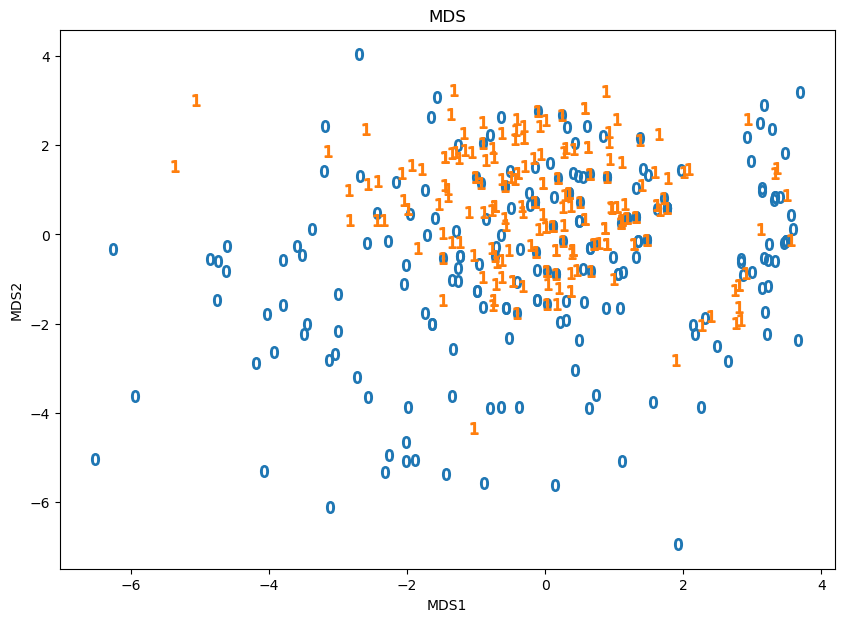

In [13]:
# MDS
Y = MDS(n_components=n_components, random_state=23).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("MDS")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()

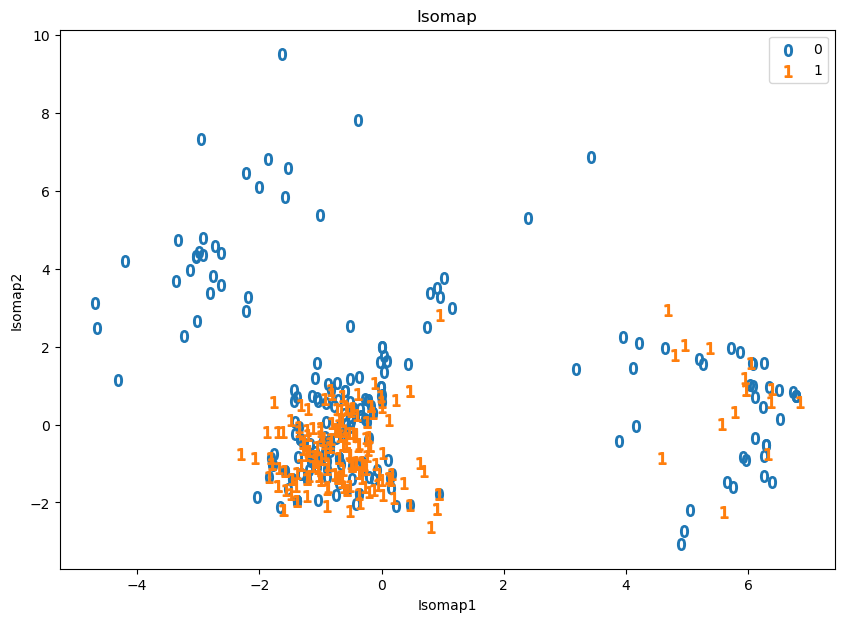

In [14]:
# Isomap
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("Isomap")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.legend()
plt.show()

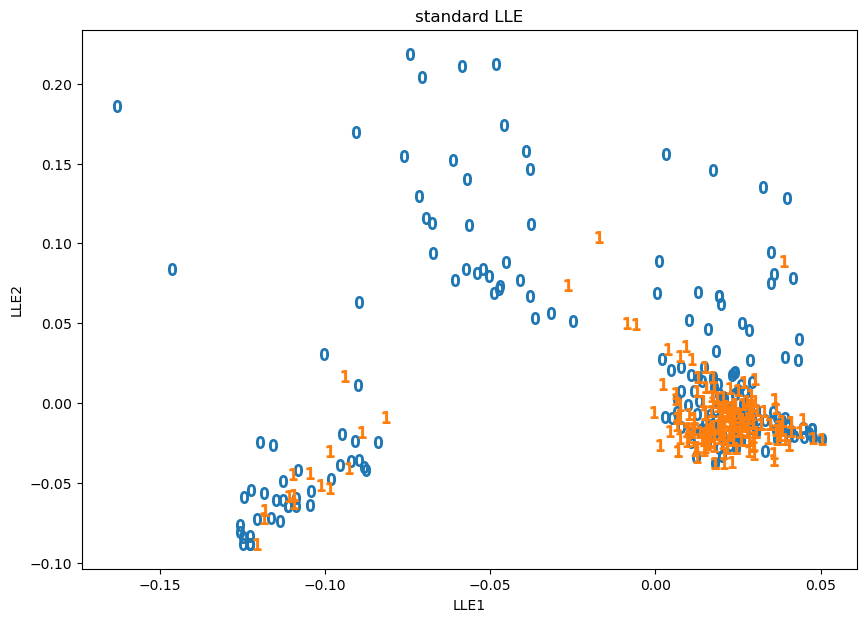

In [15]:
# LLE
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard',
                           random_state=23).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("standard LLE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('LLE1')
plt.ylabel('LLE2')
plt.show()

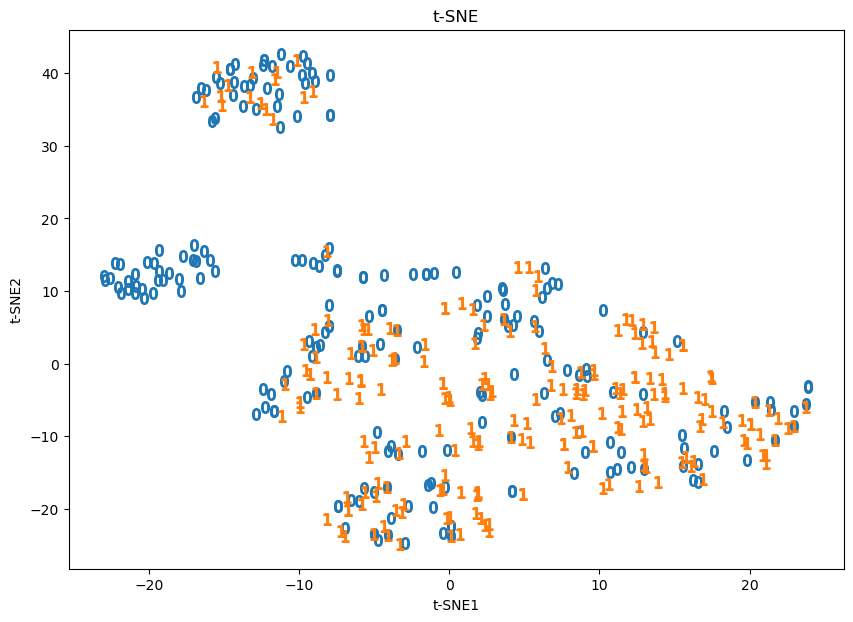

In [16]:
# t-SNE
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=23).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("t-SNE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()